In [71]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
np.random.seed(42)

In [4]:
import time

def TicTocGenerator():
    # Generator that returns time differences
    ti = 0           # initial time
    tf = time.time() # final time
    while True:
        ti = tf
        tf = time.time()
        yield tf-ti # returns the time difference

TicToc = TicTocGenerator() # create an instance of the TicTocGen generator

# This will be the main function through which we define both tic() and toc()
def toc(tempBool=True):
    # Prints the time difference yielded by generator instance TicToc
    tempTimeInterval = next(TicToc)
    if tempBool:
        print( "Elapsed time: %f seconds.\n" %tempTimeInterval )

def tic():
    # Records a time in TicToc, marks the beginning of a time interval
    toc(False)

Elapsed time: 2487.451967 seconds.

Pad case
Splitting:  5.1486e-06  +/-  9.08580233111e-07
Standard:   4.83325083884e-06  +/-  6.467690456e-06
Variance Reduction:  7.1184582498
Offsprings:  108000.0


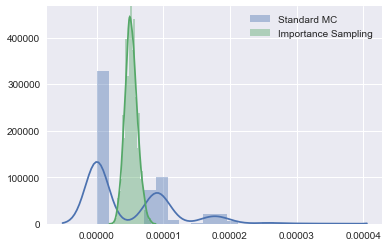

In [101]:
N = 1000;
M = 100; # Number of MC samples (Length of chain)
L = 1e4; # Number of initial Simulations
O = 1e3; # Number of Offsprings

# Transition probability
pT1 = 0.0001#13.1e-6;
pT2 = 0.00001#0.82e-7;
I = np.zeros(int(L))
p2 = np.zeros(int(N))
p3 = np.zeros(int(N))
IC = np.zeros(int(O))
pS = np.zeros(int(N))
pN = np.zeros(int(N))
tic()
for k in range(0,N):
    for i in range(0,int(L)):
        Ii = np.flatnonzero(np.random.rand(N) < pT1)
        I[i] = min(Ii.tolist(), default=M+1)
    # Calculate intermediate probability
    R2 = np.sum(1.0*(I < M+1));
    p2[k] = R2/L;
    
    N3 = 0;
    R3 = 0;
    for i in range(0, int(L)):
        if (I[i] < M+1):
            for j in range(0, int(O)):
                # Clone succesful trajectories
                YC = np.flatnonzero(np.random.rand(1,int(M-I[i]+1)) < pT2)
                # Check Offsprings for succesful trajectories
                IC[j] = min(YC.tolist(), default=M+1);
            R3 = R3 + sum(1.0*(IC < M+1));
            N3 = N3 + O;
    if (N3 > 0):
        p3[k] = R3/N3;
    else:
        p3[k] = 0;
    nS = 0
    for m in range(0, int(L+N3)):
        Ii = np.flatnonzero(np.random.rand(1,M) < pT1)
        I1 = min(Ii.tolist(), default=M+1)
        Ii = np.flatnonzero(np.random.rand(1,int(M-I1+1)) < pT2)
        nS = nS + (min(Ii.tolist(), default=M+1) < M+1)
    pS[k] = p2[k]*p3[k]
    pN[k] = nS/(L+N3)

toc()


print("Splitting: ", np.mean(pS), " +/- ", np.std(pS))
print("Standard:  ", np.mean(pN), " +/- ", np.std(pN))
print("Variance Reduction: ", (np.std(pN)/np.std(pS)))
print("Offsprings: ", (np.mean(N3)))

sns.set()
f, ax = plt.subplots(1, 1)
sns.distplot(pN, label="Standard MC")
sns.distplot(pS, label="Importance Sampling")
ax.legend()

In [103]:
f.savefig("comparison.pdf")

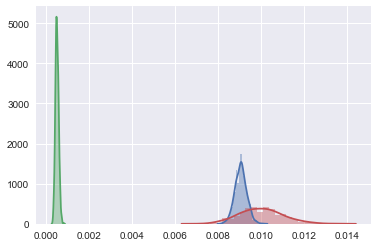

In [90]:
sns.distplot(pN, label="Standard MC")
sns.distplot(p3, label="Importance Sampling")
sns.distplot(p2, label="Standard MC")